In [24]:
%cd /storage/lab/solar-energy-prediction

/storage/lab/solar-energy-prediction


In [25]:
import os
import pandas as pd
import numpy as np

csv_files = []
for root, dirs, files in os.walk("./data/weather"):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print(csv_files)
print(len(csv_files))

['./data/weather/Aniche_hourly.csv', './data/weather/Beaupouyet_hourly.csv', './data/weather/Bugnicourt_hourly.csv', './data/weather/Cantin_hourly.csv', './data/weather/Cestas_hourly.csv', './data/weather/Colle-des-Mées_hourly.csv', './data/weather/Dechy_hourly.csv', './data/weather/Hamel_hourly.csv', './data/weather/Haulchin_hourly.csv', './data/weather/Jeumont_hourly.csv', './data/weather/Leforest_hourly.csv', './data/weather/Losse_hourly.csv', './data/weather/Lourches_hourly.csv', './data/weather/Marville_hourly.csv', './data/weather/Niergnies-Séranvillers-Forenville_hourly.csv', './data/weather/Oxelaëre_hourly.csv', './data/weather/Pont-sur-Sambre_hourly.csv', './data/weather/Prouvy-Trith-Saint-Léger_hourly.csv', './data/weather/Somain_hourly.csv', './data/weather/Thémis_hourly.csv', './data/weather/Toul-Rosières_hourly.csv']
21


In [26]:
weather_variables = ['datetime','timestamp','shortwave_radiation','temperature_2m', 'relative_humidity_2m','sunshine_duration','direct_normal_irradiance']
datasets = []
for file in csv_files:
    df = pd.read_csv(file)
    df = df[weather_variables]
    datasets.append(df)


In [27]:
features = ['shortwave_radiation','temperature_2m', 'relative_humidity_2m','sunshine_duration','direct_normal_irradiance']

summed_weather_data = datasets[0]
for df in datasets[1:]:
    summed_weather_data[features] += df[features]/ len(datasets)

In [28]:
from datetime import datetime
import zoneinfo

solar_data = pd.read_csv("data/energy/SOLAR.csv", index_col=0)
solar_data['datetime'] = solar_data['end'].apply(lambda x: datetime.fromtimestamp(x, tz=zoneinfo.ZoneInfo('Europe/Berlin')))
solar_data.head()


,start,end,values,datetime
0,1577833200,1577836800,0,2020-01-01 01:00:00+01:00
1,1577836800,1577840400,0,2020-01-01 02:00:00+01:00
2,1577840400,1577844000,0,2020-01-01 03:00:00+01:00
3,1577844000,1577847600,0,2020-01-01 04:00:00+01:00
4,1577847600,1577851200,0,2020-01-01 05:00:00+01:00


In [29]:
fused_data = pd.merge_asof(
    solar_data.sort_values('datetime'),
    summed_weather_data.sort_values('datetime'),
    left_on='end',
    right_on='timestamp',
    direction='backward')

fused_data.head()

,start,end,values,datetime_x,datetime_y,timestamp,shortwave_radiation,temperature_2m,relative_humidity_2m,sunshine_duration,direct_normal_irradiance
0,1577833200,1577836800,0,2020-01-01 01:00:00+01:00,2020-01-01 01:00:00,1577836800,0.0,1.266667,174.190476,0.0,0.0
1,1577836800,1577840400,0,2020-01-01 02:00:00+01:00,2020-01-01 02:00:00,1577840400,0.0,0.895238,173.904762,0.0,0.0
2,1577840400,1577844000,0,2020-01-01 03:00:00+01:00,2020-01-01 03:00:00,1577844000,0.0,0.952381,173.380952,0.0,0.0
3,1577844000,1577847600,0,2020-01-01 04:00:00+01:00,2020-01-01 04:00:00,1577847600,0.0,0.571429,173.428571,0.0,0.0
4,1577847600,1577851200,0,2020-01-01 05:00:00+01:00,2020-01-01 05:00:00,1577851200,0.0,1.161905,174.761905,0.0,0.0


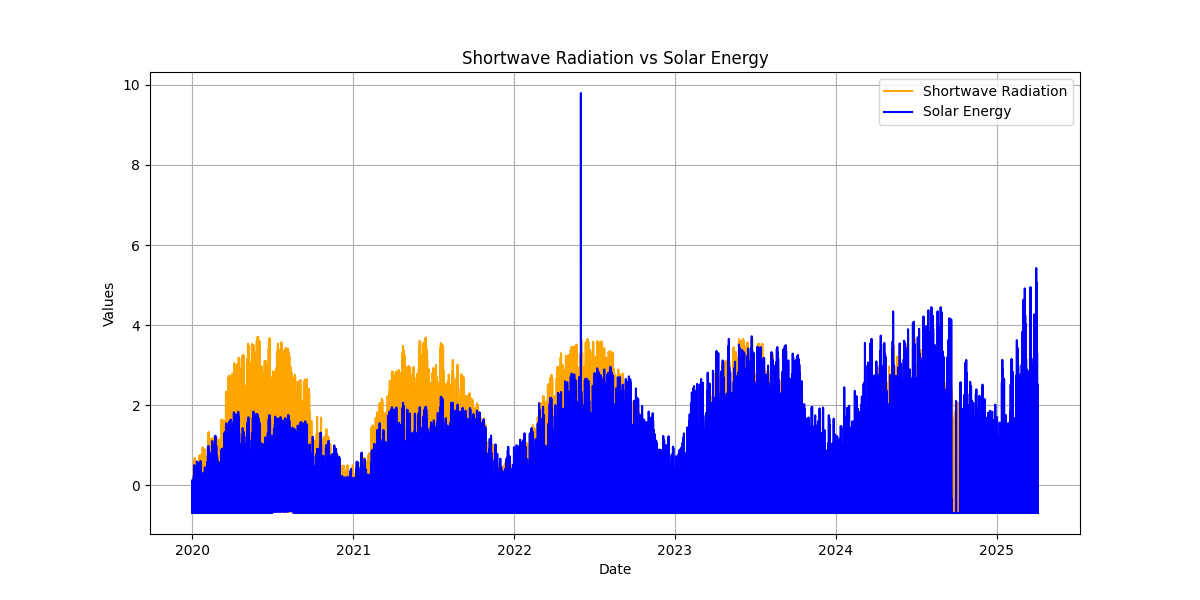

In [32]:
%matplotlib widget
import matplotlib.pyplot as plt

variables = features + ['values']

normalized_data = fused_data
normalized_data[variables] = normalized_data[variables] - normalized_data[variables].mean()
normalized_data[variables] = normalized_data[variables] / normalized_data[variables].std()

plt.figure(figsize=(12, 6))
plt.plot(fused_data['datetime_x'], fused_data['shortwave_radiation'], label='Shortwave Radiation', color='orange')
plt.plot(fused_data['datetime_x'], fused_data['values'], label='Solar Energy', color='blue')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Shortwave Radiation vs Solar Energy')
plt.legend()
plt.grid()
plt.show()